# Линейные модели

Рассмотрим среднедневное кол-во заказов блюда "Пицца" ресторанов определенного сегмента на платформе DC в марте 2019 года.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

%matplotlib inline

In [2]:
orders_info = pd.read_excel('files/lesson_3/mar_2019_Samara_pizza.xlsx')
orders_info.head()

,Price,Orders
0,912,32
1,958,25
2,979,11
3,530,33
4,750,16


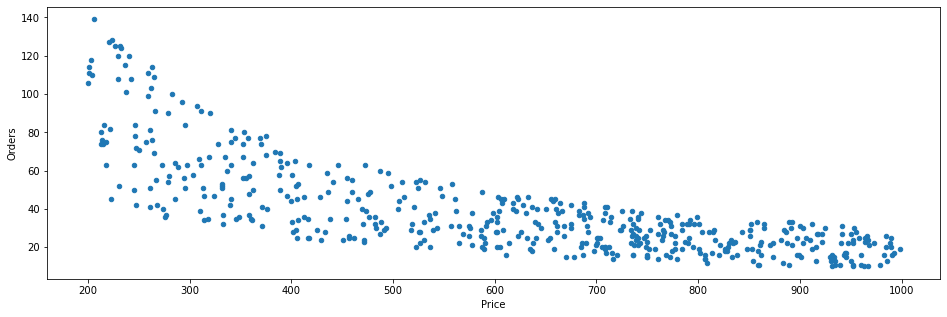

In [3]:
fig = plt.figure(figsize=(16,5))
ax1 = plt.subplot(111)

orders_info.plot.scatter('Price','Orders',ax = ax1)

**Задача.** На платформе появляется новый ресторан и хочет продавать Пиццу по определенной цене. Сколько у данного ресторана будет продаж в день?

Чтобы решить поставленную задачу - необходимо **обобщить** закономерности цены и кол-ва продаж.

По графику можно сделать вывод о существовании зависимости между ценой и количеством продаж. Если предположить, что зависимость приблизительно линейная, ее можно представить в виде прямой на этом графике. По этой прямой и можно будет предсказать количество продаж.

-----

Будем искать линейную зависимость между данными, построив уравнение прямой (уравнение регрессии):

$ \Large y_i = \beta_0 + \beta_1 x_i + \epsilon_i$


где 


$y_i$ - это зависимая переменная (отклик)

$x_i$ — известная константа (значение объясняющей переменной, измерянной в i-ом эксперименте)

$\beta_0, \beta_1$ — параметры модели (свободный член и угловой коэффициент)

$\epsilon_i$ - случайная ошибка

То есть, нужно построить такую прямую, относительно которой разброс точек будет минимален. Для этого надо найти параметры уравнения регрессии $\beta_0, \beta_1$ ,а затем оценить получившиеся результаты (возможно, что найденная зависимость крайне плохо обобщает данные).

-----

### Аналитическое решение

Способ нахождения линии, сумма квадратов расстояний от которой до всех точек выборки минимальна,
называется **методом наименьших квадратов**. В основе - минимизация расстояния от прямой регрессии до каждой из точек выборки, по-другому - минимизация ошибки расстояний между точками выборки и прямой регрессии.

Чаще всего функционал линейной регрессии минимизирует **среднеквадратичную ошибку** - получаем задачу оптимизации функции стоимости:

$\Large \begin{array}{rcl}\mathcal{L}\left(X, \vec{y}, \vec{w} \right) =  \frac{1}{2n} \sum_{i=1}^n \left(y_i - \vec{x}_i^T \vec{w}_i\right)^2 \\ = \frac{1}{2n} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right) \end{array}$

где 

$\vec{w}$ - это вектор параметров модели.

Если продифференцировать данный функционал по вектору $\vec{w}$, приравнять к нулю и решить уравнение, то получим явную формулу для решения:

$\Large \vec{w} = \left(X^T X\right)^{-1} X^T \vec{y}$


<img width = '600px' src="images/lesson_3/pr.png">

Оценка МНК является **лучшей** оценкой параметров модели, среди всех линейных и несмещенных оценок, то есть обладающей наименьшей дисперсией (из теоремы Гаусса — Маркова).

**Предположения МНК**

- Предполагается, что истинная модель y действительно линейна.
- Предполагается, что наблюдения, по которым оценивается модель, случайны, то есть объекты дают независимую выборку наблюдений.
- Предполагается, что ни один из признаков не является линейной комбинацией других.
- Предполагается, что ошибка случайна.

### Линейная регрессия с Numpy

In [15]:
from numpy.linalg import inv

X  = orders_info['Price'].values
y  = orders_info['Orders'].values

# print(orders_info.head(), '\n')
# print(X, '\n')

X = X.reshape((len(X), 1))
ones_ = np.ones(X.shape).reshape((len(X), 1))

X = np.hstack((X,ones_))
# print(X, '\n')

# w = [B1, B0]
w = inv(X.T.dot(X)).dot(X.T).dot(y) 

ymean = np.mean(y)

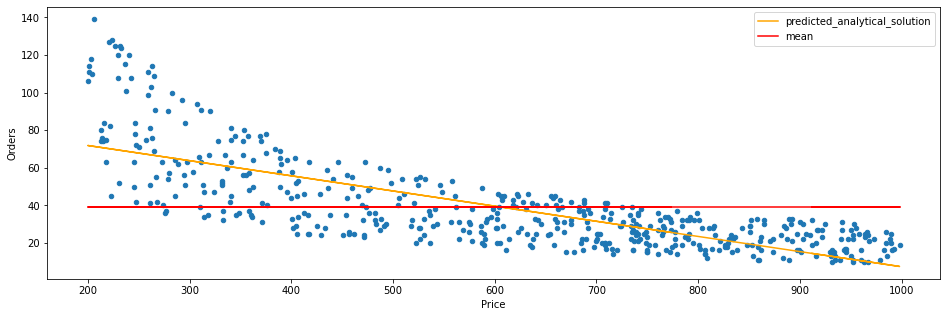

In [16]:
orders_info['predicted_analytical_solution'] = w[1] + w[0]*orders_info['Price']
orders_info['mean'] = ymean

fig = plt.figure(figsize=(16,5))
ax1 = plt.subplot(111)

orders_info.plot.scatter('Price','Orders',ax = ax1)
orders_info.plot.line('Price','predicted_analytical_solution',ax = ax1,color = 'orange')
orders_info.plot.line('Price','mean',ax = ax1,color = 'red')

**Недостатки МНК**
- Для нахождения решения необходимо вычислять обратную матрицу. Операция обращения матрицы требует, в случае d признаков, выполнение порядка $d^3$ операции, и является вычислительно сложной уже в задачах с десятком признаков.
- Численный способ нахождения обратной матрицы не может быть применен в некоторых случаях(когда матрица плохо обусловлена).

### Проверка качества полученного решения

Теперь надо оценить качество решения, получившегося с помощью метода наименьших квадратов.

Среднеквадратичная ошибка:

$\Large MSE = \frac{\sum_{i=1}^n(\hat{y_i}-y_i)^2}{n} $ 

Среднеквадратичная ошибка подходит для сравнения двух моделей или для контроля качества во время обучения, но не позволяет сделать выводы том, насколько хорошо данная модель решает задачу. Вместо среднеквадратичной ошибки полезно использовать **коэффициент детерминации**.

Попробуем нормализовать ошибку:

$\Large TSS =  ESS + RSS $

$\Large TSS = \sum_{i=1}^n(y_i-\overline{y})^2 $ - разброс относительно своего среднего.

$\Large ESS = \sum_{i=1}^n(\hat{y_i}-\overline{y})^2 $ - объясненная сумма квадратов,сумма квадратов отклонений среднего от предсказанных y.

$\Large RSS = \sum_{i=1}^n(\hat{y_i}-y_i)^2 $ - остаточная сумма квадратов.

$\Large R^2 = \frac{ESS}{TSS}$ - **коэффициент детерминации**, доля объясненной дисперсии отклика во всей дисперсии отклика.

<img width = '1000px' src="images/lesson_3/lr_2.png">

In [17]:
TSS = ((y - ymean) ** 2).sum()
ESS = ((orders_info['predicted_analytical_solution'] - ymean) ** 2).sum()

detCoef = ESS/TSS
detCoef

0.5800274817271218

Используем уже готовые реализации.

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10)

y_train_pred = w[1] + w[0]*X_train[:,0]
y_test_pred = w[1] + w[0]*X_test[:,0]

In [20]:
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 244.650, test: 254.315
R^2 train: 0.579, test: 0.581


### Линейная регрессия c библиотекой sklearn

In [23]:
from sklearn.linear_model import LinearRegression

linearmodel = LinearRegression()
linearmodel.fit(X,y)

# y_pred = model.intercept_ + model.coef_ * x
# Код ниже показывает, как получить b₀ и b₁. Заметьте, что .intercept_ – это скаляр, в то время как .coef_ – массив.
print('Коэффициент b1: ', linearmodel.coef_[0])
# model содержит атрибуты .intercept_, который представляет собой коэффициент, и b₀ с .coef_, которые представляют b₁:
print('Коэффициент b0: ',linearmodel.intercept_)

# Вы можете получить определения (R²) с помощью .score(), вызванной на model:
print('R^2 - коэффициент детерминации: ', linearmodel.score(X,y))


Коэффициент b1:  -0.0806587218184746
Коэффициент b0:  87.98934575195264
R^2 - коэффициент детерминации:  0.5800274817271208


### Линейная регрессия с библиотекой statsmodels


In [36]:
import statsmodels

import statsmodels.formula.api as smf
model = smf.ols('Orders~Price',data=orders_info)
fitted = model.fit()

In [37]:
fitted.params

Intercept    87.989346
Price        -0.080659
dtype: float64

In [38]:
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                 Orders   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     687.8
Date:                Sat, 12 Oct 2019   Prob (F-statistic):           7.12e-96
Time:                        13:52:24   Log-Likelihood:                -2087.4
No. Observations:                 500   AIC:                             4179.
Df Residuals:                     498   BIC:                             4187.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     87.9893      1.999     44.010      0.0

Критерий Фишера для регрессионной модели отражает, насколько хорошо эта модель объясняет общую дисперсию зависимой переменной. 

$\Large F =  \frac{R^2/k}{(1 - R^2)/(n-k-1)}$,

где

$n$ - кол-во объясняющих переменных,

$k$ - кол-во эксперементальных точек.

Для проверки значимости уравнения регрессии вычисленное значение критерия Фишера сравнивают с табличным на выбранном уровне значимости (обычно 0.05). Если рассчитанный критерий Фишера выше, чем табличный, то объясненная дисперсия существенно больше, чем необъясненная, и модель является значимой.

In [39]:
print(fitted.f_pvalue)
print(fitted.fvalue)

7.124488003451089e-96
687.7918752588998


### Решение методом градиентного спуска

МНК - не всегда лучший способ решения, регрессию можно решить итерационно - с помощью метода **градиентного спуска**.

Суть **градиентного спуска** – минимизировать функцию, делая небольшие шаги в сторону наискорейшего убывания функции. Название методу подарил тот факт из математического анализа, что вектор $\nabla f = (\frac{\partial f}{\partial x_1}, \ldots \frac{\partial f}{\partial x_n})^T$ частных производных функции $f(x) = f(x_1, \ldots x_n)$ задает направление наискорейшего возрастания этой функции. Значит, двигаясь в сторону антиградиента функции (вектора, противоположного градиенту), можно уменьшать ее значение быстрее всего. 

Нам нужно минимизировать среднеквадратичную ошибку.

$\Large MSE = \frac{\sum_{i=1}^n(\hat{y_i}-y_i)^2}{n} \rightarrow min $ 

$\Large f = \frac{\sum_{i=1}^n(\hat{y_i}-(w_0 + w_1x_{i}))^2}{n} \rightarrow min $ 

<img width = '500px' src="images/lesson_3/gradient_descent_demystified.png">

Итерационно меняем веса так, чтобы делать небольшой шаг $\eta$ на каждой итерации в сторону антиградиента функции.

$\Large \begin{array}{rcl} w_0^{(t+1)} = w_0^{(t)} -\eta \frac{\partial f}{\partial w_0} |_{t} \\  w_1^{(t+1)} = w_1^{(t)} -\eta \frac{\partial f}{\partial w_1} |_{t} \end{array}$

Рассчитаем производные:

$\Large \begin{array}{rcl} w_0^{(t+1)} = w_0^{(t)} + \eta \sum_{i=1}^{\ell}(y_i - w_0^{(t)} - w_1^{(t)}x_i) \\  w_1^{(t+1)} = w_1^{(t)} + \eta \sum_{i=1}^{\ell}(y_i - w_0^{(t)} - w_1^{(t)}x_i)x_i \end{array}$

In [7]:
X  = orders_info['Price'].values
y  = orders_info['Orders'].values

In [8]:
# нормализация данных
X_scaled = (X - X.mean())/X.std()

# Задаем начальные приближения для w0 и w1
w0 = 100
w1 = -1

L = 0.001  #шаг обновления весов
epochs = 10 # кол-во итераций

n = float(len(X_scaled))

for i in range(epochs): 
    
    w1 = w1 + L * sum(X_scaled*(y - w0 - w1*X_scaled)) 
    w0 = w0 + L * sum((y - w0 - w1*X_scaled))    
    
    plt.show()
    
#     break

print (w1, w0)

-18.473260008430472 38.98364453125


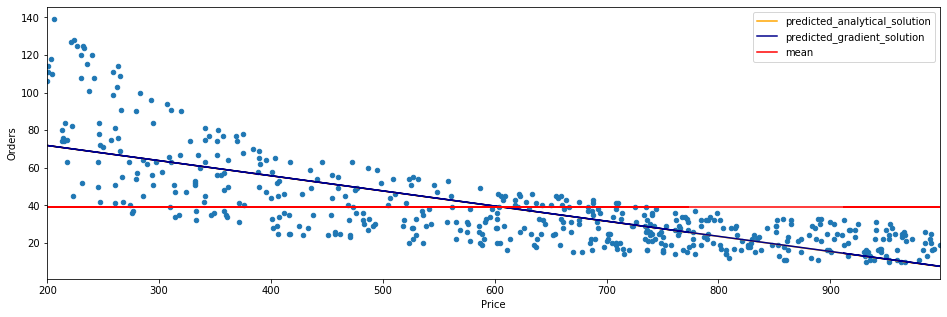

In [43]:
orders_info['predicted_gradient_solution'] = w0 + w1*X_scaled
orders_info['mean'] = ymean

fig = plt.figure(figsize=(16,5))
ax1 = plt.subplot(111)

orders_info.plot.scatter('Price','Orders',ax = ax1)
orders_info.plot.line('Price','predicted_analytical_solution',ax = ax1,color = 'orange')
orders_info.plot.line('Price','predicted_gradient_solution',ax = ax1,color = 'darkblue')

orders_info.plot.line('Price','mean',ax = ax1,color = 'red')

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=10)

y_train_pred = w0 + w1*X_train
y_test_pred = w0 + w1*X_test


print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 244.632, test: 254.371
R^2 train: 0.579, test: 0.581


### Регуляризация линейных моделей

**Переобучение** (переподгонка, пере- в значении «слишком», англ. overfitting) в машинном обучении и статистике — явление, когда построенная модель хорошо объясняет примеры из обучающей выборки, но относительно плохо работает на примерах, не участвовавших в обучении (на примерах из тестовой выборки).

Основные признаки переобученности модели - большие веса у признаков в модели.


Рассмотрим полиноминальную регрессию:

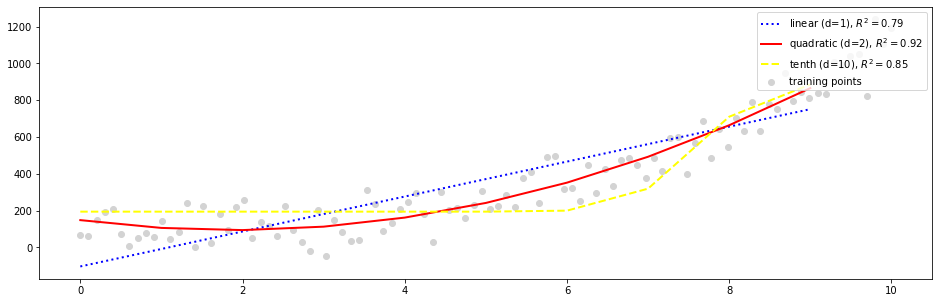

In [45]:
from sklearn.preprocessing import PolynomialFeatures


n_samples = 100
X = np.linspace(0, 10, 100)
y = X ** 3 + np.random.randn(n_samples) * 100 + 100

X = X.reshape(-1,1)

regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
tenth = PolynomialFeatures(degree=40)
X_quad = quadratic.fit_transform(X)
X_tenth = tenth.fit_transform(X)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_tenth, y)
y_tenth_fit = regr.predict(tenth.fit_transform(X_fit))
tenth_r2 = r2_score(y, regr.predict(X_tenth))

fig = plt.figure(figsize=(16,5))

# plot results
plt.scatter(X, y, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2={:.2f}$'.format(linear_r2), 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2), $R^2={:.2f}$'.format(quadratic_r2),
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_tenth_fit, 
         label='tenth (d=10), $R^2={:.2f}$'.format(tenth_r2),
         color='yellow', 
         lw=2, 
         linestyle='--')

plt.legend(loc='upper right')
plt.show()

In [46]:
regr.coef_

array([-4.71431551e-27, -1.12598236e-26, -2.04278093e-26,  4.38832766e-27,
       -9.54510798e-28,  1.63396727e-28, -4.37588660e-29,  5.09764049e-28,
        3.28046257e-42,  8.86307810e-42,  6.22955201e-41,  4.34872578e-40,
        3.01411579e-39,  2.07311574e-38,  1.41401018e-37,  9.55603527e-37,
        6.39233848e-36,  4.22749079e-35,  2.76021752e-34,  1.77637918e-33,
        1.12468112e-32,  6.98941066e-32,  4.25198659e-31,  2.52381901e-30,
        1.45576031e-29,  8.11900907e-29,  4.35028304e-28,  2.22079597e-27,
        1.06809437e-26,  4.76471442e-26,  1.92688877e-25,  6.81525742e-25,
        1.98038448e-24,  4.14706790e-24,  4.08214884e-24, -3.72554487e-24,
        1.09465062e-24, -1.62655405e-25,  1.33209952e-26, -5.75972973e-28,
        1.03157766e-29])

Cложные модели, у которых степеней свободы достаточно много, могут попросту запомнить весь тренировочный набор, полностью теряя обобщающую способность.

Переобучение дает неплавные кривые прогнозирования, т. е. «нерегулярные». Такие плохие сложные кривые прогнозирования обычно характеризуются весовыми значениями, которые имеют очень большие или очень малые величины. Поэтому один из способов уменьшить степень переобучения состоит в том, чтобы не допускать очень малых или больших весовых значений для модели. В этом и заключается суть регуляризации.

**Регуляризация** — это способ уменьшить сложность модели чтобы предотвратить переобучение или исправить некорректно поставленную задачу.

### $L^2$ - регуляризация

$\Large \begin{array}{rcl}\mathcal{L}\left(X, \vec{y}, \vec{w} \right) = \frac{1}{2n} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right) \end{array} + \frac{\lambda}{2} \vec{w}^T \vec{w} $

Суть состоит в том, что мы изменяем нашу первоначальную функцию, добавляя «штраф» на большие весовые коэффициенты. Мы добавляем квадрат величины весовых коэффициентов, умноженный на константу λ, к нашей прежней квадратической функции погрешностей. Мы делаем это потому, что большое значение весовых коэффициентов являются признаком переобученности. 

$\Large \begin{array}{rcl} w_0^{(t+1)} = w_0^{(t)} + \eta (\sum_{i=1}^{\ell}(y_i - w_0^{(t)} - w_1^{(t)}x_i) + \lambda w_0^{(t)} ) \\  w_1^{(t+1)} = w_1^{(t)} + \eta (\sum_{i=1}^{\ell}(y_i - w_0^{(t)} - w_1^{(t)}x_i)x_i + \lambda w_1^{(t)}) \end{array}$

### $L^1$ - регуляризация


$\Large \begin{array}{rcl}\mathcal{L}\left(X, \vec{y}, \vec{w} \right) = \frac{1}{2n} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right) \end{array} + \lambda |w| $

В основе L1-регуляризации лежит достаточно простая идея. Как и в случае L2-регуляризации, мы просто добавляем штраф к первоначальной функции затрат.

$\Large \begin{array}{rcl} w_0^{(t+1)} = w_0^{(t)} + \eta (\sum_{i=1}^{\ell}(y_i - w_0^{(t)} - w_1^{(t)}x_i) + \lambda sign(w_0^{(t)}) ) \\  w_1^{(t+1)} = w_1^{(t)} + \eta (\sum_{i=1}^{\ell}(y_i - w_0^{(t)} - w_1^{(t)}x_i)x_i + \lambda sign(w_1^{(t)})) \end{array}$

---

- L1-регуляризация реализует это путём отбора наиболее важных факторов, которые сильнее всего влияют на результат. Для простоты можете считать, что факторы с малой величиной влияния на конечный результат фактически «помогают» вам предсказывать лишь шум в наборе обучающих данных.
- L2-регуляризация предотвращает переобученность модели путём запрета на непропорционально большие весовые коэффициенты.

http://rasbt.github.io/mlxtend/user_guide/general_concepts/regularization-linear/